<a href="https://colab.research.google.com/github/VallentinDS/Data-Science-Projects/blob/main/EXPN_NLP_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# NLP Analysis

Actions to be taken:
- Import the data
- Remove unnecessary columns


Columns to have:
- Word Count
    - Count words
    - Count characthers
- Spell Check (not required)

Analysis: 

- Compare volume coverage over time (are we appearing against more terms/new terms, how do they perform) -
    - number of total terms, how many were new that weren't in the previous years. 
    - Was the CTR/CPC higher for those terms

- Compare search term length over time (are we appearing against longer tail search terms, how do they perform)
    - Word count and character count

- Compare educational search terms over time (are we appearing against more "how", "what", etc. terms, how do they perform)
    - Create a column, filter for terms like "what", "how"
    - Do a educational vs non-educational comparison


- Compare increases in certain topics over time - without the NLP model in the short term, extracting each noun out of the terms to detect topics is going to be impossible, but if you provide us with a list of 3-5 terms we could use we can test their uptick over time?
    - Create topics

        For the topics which I think it would be good to check, my initial thoughts are: 
        - Improve credit score and terms related to this
        - Bad credit related terms
        - Credit score transactional terms – “credit score”, “free credit score”, “check my credit score”
        - Credit score terms including loans, credit cards or mortgages

# Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
# import mitosheet


In [ ]:
# # Installing SQL module
# !pip install iphyton-sql

# # Loading the SQL module
# %load_ext sql

# # Establising the connection with SQLite
# %sql sqlite://


In [ ]:
# This is for local analysis

# import os
# current_directory = os.getcwd()
# print(current_directory)

# os.chdir("/Users/valentinciocirlan/Desktop/Jellyfish/Experian/NLP analysis/")

# fy23 = pd.read_csv("/Users/valentinciocirlan/Desktop/Jellyfish/Experian/NLP analysis/FY23 Q2  - Search terms.csv", 
#                    skiprows= 2, 
#                    skipfooter=10, 
#                    engine= 'python', 
#                    usecols=['Search term', 'Match type', 'Campaign', 'Ad group', 'Avg. CPV', 'Clicks', 'Avg. CPC', 'Impr.', 'Interactions', 'Interaction rate', 'Avg. cost', 'Cost'])

# fy22 = pd.read_csv("/Users/valentinciocirlan/Desktop/Jellyfish/Experian/NLP analysis/FY22 Q2  - Search terms.csv", 
#                    skiprows= 2, 
#                    skipfooter=10, 
#                    engine= 'python', 
#                    usecols=['Search term', 'Match type', 'Campaign', 'Ad group', 'Avg. CPV', 'Clicks', 'Avg. CPC', 'Impr.', 'Interactions', 'Interaction rate', 'Avg. cost', 'Cost'])

# fy21 = pd.read_csv("/Users/valentinciocirlan/Desktop/Jellyfish/Experian/NLP analysis/FY21 Q2  - Search terms.csv", 
#                    skiprows= 2, 
#                    skipfooter=10, 
#                    engine= 'python', 
#                    usecols=['Search term', 'Match type', 'Campaign', 'Ad group', 'Avg. CPV', 'Clicks', 'Avg. CPC', 'Impr.', 'Interactions', 'Interaction rate', 'Avg. cost', 'Cost'])

In [ ]:
# This is for Google Colab analysis

# import os
# current_directory = os.getcwd()
# print(current_directory)

# os.chdir("/Users/valentinciocirlan/Desktop/Jellyfish/Experian/NLP analysis/")

from google.colab import drive
drive.mount('/content/drive')

fy23 = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/EXPN NLP Analysis/FY23 Q2 - Search terms.csv", 
                   skiprows= 2, 
                   skipfooter=10, 
                   engine= 'python', 
                   usecols=['Search term', 'Search terms match type', 'Clicks', 'Impr.', 'CTR', 'Avg. CPC', 'Cost', 'Conversions', 'Cost / conv.', 'Conv. rate'])

fy22 = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/EXPN NLP Analysis/FY22 Q2 - Search terms.csv", 
                   skiprows= 2, 
                   skipfooter=10, 
                   engine= 'python', 
                   usecols=['Search term', 'Search terms match type', 'Clicks', 'Impr.', 'CTR', 'Avg. CPC', 'Cost', 'Conversions', 'Cost / conv.', 'Conv. rate'])

fy21 = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/EXPN NLP Analysis/FY21 Q2 - Search terms.csv", 
                   skiprows= 2, 
                   skipfooter=10, 
                   engine= 'python', 
                   usecols=['Search term', 'Search terms match type', 'Clicks', 'Impr.', 'CTR', 'Avg. CPC', 'Cost', 'Conversions', 'Cost / conv.', 'Conv. rate'])


# dropping the search terms that repeat themselves
fy23_unique_terms = fy23.drop_duplicates(subset='Search term')
fy22_unique_terms = fy22.drop_duplicates(subset='Search term')
fy21_unique_terms = fy21.drop_duplicates(subset='Search term')

# Another option would be to use df.groupby("Search term").mean()


print("Number of terms for FY21 is:", len(fy21))
print("Number of terms for FY22 is:", len(fy22))
print("Number of terms for FY23 is:", len(fy23))
print('\n')
print("Number of unique terms for FY21 is:", len(fy21_unique_terms))
print("Number of unique terms for FY22 is:", len(fy22_unique_terms))
print("Number of unique terms for FY23 is:", len(fy23_unique_terms))

Mounted at /content/drive
Number of terms for FY21 is: 53775
Number of terms for FY22 is: 377695
Number of terms for FY23 is: 587799


Number of unique terms for FY21 is: 31349
Number of unique terms for FY22 is: 232300
Number of unique terms for FY23 is: 364133


In [ ]:
# Checking purposes
# fy21_unique_terms

In [ ]:
tables = [fy21, fy22, fy23, fy21_unique_terms, fy22_unique_terms, fy23_unique_terms]
columns = ['Clicks', 'Impr.','CTR', 'Avg. CPC', 'Cost', 'Conversions', 'Cost / conv.', 'Conv. rate']

# # count the numnber of characters without space and number of words

def table_transformation(list_tables, list_columns):
  for table in list_tables:
      table['character_count'] = table['Search term'].apply(lambda x: len(x) - x.count(' '))
      table['word_count'] = table['Search term'].apply(lambda x: len(x.split()))

      table.astype({'Clicks': 'str',
                    'Impr.': 'str',
                    'CTR': 'str',
                    'Avg. CPC': 'str',
                    'Cost': 'str',
                    'Conversions': 'str',
                    'Cost / conv.': 'str',
                    'Conv. rate': 'str'})
      

      for column in list_columns:
          table[column] = table[column].replace(',', '', regex=True)
          table[column] = table[column].replace('--', '0.0', regex=True)
          table[column] = table[column].replace('%', '', regex=True)

      table['Clicks'] = table['Clicks'].astype('int64')
      table['Avg. CPC'] = table['Avg. CPC'].astype('float64')
      table['CTR'] = table['CTR'].astype('float64')
      table['Cost'] = table['Cost'].astype('float64')
      table['Conversions'] = table['Conversions'].astype('float64')
      table['Impr.'] = table['Impr.'].astype('int64')
      table['Cost / conv.'] = table['Cost / conv.'].astype('float64')
      table['Conv. rate'] = table['Conv. rate'].astype('float64')

table_transformation(tables,columns)

<ipython-input-6-39e286d73c0b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['character_count'] = table['Search term'].apply(lambda x: len(x) - x.count(' '))
<ipython-input-6-39e286d73c0b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['word_count'] = table['Search term'].apply(lambda x: len(x.split()))
<ipython-input-6-39e286d73c0b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [ ]:
# for table in tables:
#     table.astype({'Impr.': 'str',
#                   'Clicks': 'str',
#                   'CTR': 'str',
#                   'Avg. CPC': 'str',
#                   'Conversions': 'str',
#                   'Cost / conv.': 'str',
#                   'Conv. rate': 'str',
#                   'Cost': 'str'})
    
#     for column in columns:
#         # table[column] = table[column].replace({',': '',
#         #                                        '--': '0.0',
#         #                                        '%': ''})
#         table[column] = table[column].replace(',', '')
#         table[column] = table[column].replace('--', '0.0')
#         table[column] = table[column].replace('%', '')
        
#     table['Avg. CPV'] = table['Avg. CPV'].astype('int64')
#     table['Clicks'] = table['Clicks'].astype('int64')
#     table['Avg. CPC'] = table['Avg. CPC'].astype('float64')
#     table['CTR'] = table['CTR'].astype('float64')
#     table['Cost'] = table['Cost'].astype('int64')
#     table['Conversions'] = table['Conversions'].astype('float64')
#     table['Impr.'] = table['Impr.'].astype('int64')
#     table['Cost / conv.'] = table['Cost / conv.'].astype('float64')
#     table['Conv. rate'] = table['Conv. rate'].astype('float64')
    
#     # # table['Interaction '] = table['Interaction rate'].apply(lambda x: x/100)
    
# # checking purposes
# fy21_unique_terms.info()

# Compare volume coverage over time

- Compare volume coverage over time (are we appearing against more terms/new terms, how do they perform) -
    - number of total terms, how many were new that weren't in the previous years. 


In [ ]:
# Creating a dataframe of all the old terms
old_terms_df = pd.concat([fy22, fy21], axis= 'index', verify_integrity= True, ignore_index= True)
# old_terms_df.head()
old_unique_terms_df = pd.concat([fy22_unique_terms, fy21_unique_terms], axis='index', verify_integrity= True, ignore_index= True)
old_unique_terms_df

,Search term,Search terms match type,Clicks,Impr.,CTR,Avg. CPC,Cost,Conversions,Cost / conv.,Conv. rate,character_count,word_count
0,best anti fraud credit card,Broad match,0,1,0.00,0.00,0.00,0.0,0.0,0.0,23,5
1,how to make credit score go up fast,Exact match (close variant),0,1,0.00,0.00,0.00,0.0,0.0,0.0,28,8
2,admiral insurance car uk,Broad match,1,2,50.00,2.23,2.23,0.0,0.0,0.0,21,4
3,swiftcover quote,Broad match,0,2,0.00,0.00,0.00,0.0,0.0,0.0,15,2
4,apply for an amex,Broad match,0,29,0.00,0.00,0.00,0.0,0.0,0.0,14,4
...,...,...,...,...,...,...,...,...,...,...,...,...
263644,cheap car insurance young drivers no black box,Phrase match,1,1,100.00,2.06,2.06,0.0,0.0,0.0,39,8
263645,check loans,Exact match,8,35,22.86,0.77,6.12,0.0,0.0,0.0,10,2
263646,creditmatcher sign in,Exact match,2,2,100.00,0.72,1.44,0.0,0.0,0.0,19,3
263647,how to remove default on credit report,Phrase match (close variant),0,1,0.00,0.00,0.00,0.0,0.0,0.0,32,7


In [ ]:
# check how many terms are "new" that do not appear in the previous years

# fy23_terms = pd.merge(fy23_unique_terms, old_unique_terms_df, on='Search term', how= 'left', indicator='Exist')
# new_terms_df['Exist'] = np.where(new_terms_df.Exist == 'both', True, False)

fy23_absolute_unique_terms = pd.merge(fy23_unique_terms, old_unique_terms_df, on='Search term', how= 'left', indicator='Exist')

new_unique_terms_only = fy23_absolute_unique_terms[fy23_absolute_unique_terms['Exist'] == 'left_only']
# new_terms_only = fy23_terms[fy23_terms['Exist'] == 'left_only']
print("There are ", len(new_unique_terms_only), "unique terms used only in FY23 Q2.")


There are  229918 unique terms used only in FY23 Q2.


## Overlap Terms

The overlap terms are terms that occure both in FY23 and in FY22 and FY21. This is for calculating statistics for 

In [ ]:
# Creating a dataframe for overlapping terms

overlap_terms = fy23_absolute_unique_terms[fy23_absolute_unique_terms['Exist'] == 'both']
overlap_terms = overlap_terms.drop(overlap_terms.columns[[-2, -3, -4, -5, -6 , -7, -8, -9, -10, -11, -12]], axis=1)
overlap_terms.columns = overlap_terms.columns.str.strip('_x')

overlap_terms = overlap_terms.drop_duplicates(subset='Search term')

overlap_terms

,Search term,Search terms match type,Clicks,Impr.,CTR,Avg. CPC,Cost,Conversions,Cost / conv.,Conv. rate,character_count,word_count,Exist
2,interest free loan government,Broad match,0,4,0.0,0.00,0.00,0.0,0.0,0.0,26,4,both
3,how to get credit score up fast uk,Phrase match (close variant),0,1,0.0,0.00,0.00,0.0,0.0,0.0,27,8,both
5,0 fee credit cards,Broad match,0,1,0.0,0.00,0.00,0.0,0.0,0.0,15,4,both
6,quick lon,Broad match,0,6,0.0,0.00,0.00,0.0,0.0,0.0,8,2,both
7,free experian credit report money saving expert,Phrase match,1,1,100.0,3.83,3.83,0.0,0.0,0.0,41,7,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386358,compare t,Broad match,0,3,0.0,0.00,0.00,0.0,0.0,0.0,8,2,both
386359,cash loan uk online,Broad match,0,1,0.0,0.00,0.00,0.0,0.0,0.0,16,4,both
386361,amex avios offer,Broad match,0,1,0.0,0.00,0.00,0.0,0.0,0.0,14,3,both
386362,compare two mortgage rates,Phrase match (close variant),0,18,0.0,0.00,0.00,0.0,0.0,0.0,23,4,both


## Was the CTR/CPC higher for those terms?

### Calculating the CTR and CPC for all terms

In [ ]:
# calculating the CTR & CPC for ALL older terms

# old_terms_ctr = old_terms_df['Clicks'].sum() / old_terms_df['Impr.'].sum()
# old_terms_cpc = old_terms_df['Cost'].sum() / old_terms_df['Clicks'].sum()

# #dropping unnecessary columns from new_terms_df
# new_terms_clean = new_terms_only.drop(new_terms_only.columns[[-1,-2,-3, -4, -5, -6 , -7, -8, -9, -10, -11, -12]], axis=1)

# new_terms_ctr = new_terms_clean['Clicks_x'].sum() / new_terms_clean['Impr._x'].sum()
# new_terms_cpc = new_terms_clean['Cost_x'].sum() / new_terms_clean['Impr._x'].sum()

# print("Old terms have a CTR of {0:.2f} and a CPC of {1:.2f}".format(old_terms_ctr, old_terms_cpc))
# print("New terms have a CTR of {0:.2f} and a CPC of {1:.2f}".format(new_terms_ctr, new_terms_cpc))

### Calculating for CTR and CPC ONLY for Unique terms

In [ ]:
old_unique_terms_ctr = old_unique_terms_df['Clicks'].sum() / old_unique_terms_df['Impr.'].sum()
old_unique_terms_cpc = old_unique_terms_df['Cost'].sum() / old_unique_terms_df['Clicks'].sum()

#dropping unnecessary columns from new_terms_df
new_unique_terms_clean = new_unique_terms_only.drop(new_unique_terms_only.columns[[-1,-2,-3, -4, -5, -6 , -7, -8, -9, -10, -11, -12]], axis=1)

new_unique_terms_ctr = new_unique_terms_clean['Clicks_x'].sum() / new_unique_terms_clean['Impr._x'].sum()
new_unique_terms_cpc = new_unique_terms_clean['Cost_x'].sum() / new_unique_terms_clean['Impr._x'].sum()

overlap_terms_ctr = overlap_terms['Clicks'].sum() / overlap_terms['Impr.'].sum()
overlap_terms_cpc = overlap_terms['Cost'].sum() / overlap_terms['Impr.'].sum()

print("Old unique terms have a CTR of {0:.2f} and a CPC of {1:.2f}".format(old_unique_terms_ctr, old_unique_terms_cpc))
print("New unique terms have a CTR of {0:.2f} and a CPC of {1:.2f}".format(new_unique_terms_ctr, new_unique_terms_cpc))
print("Overlap terms have a CTR of {0:.2f} and a CPC of {1:.2f}".format(overlap_terms_ctr, overlap_terms_cpc))


Old unique terms have a CTR of 0.35 and a CPC of 0.47
New unique terms have a CTR of 0.05 and a CPC of 0.09
Overlap terms have a CTR of 0.15 and a CPC of 0.35


We can see a lower CTR for newer terms, 5% vs 28%.
But newer terms also have a lower CPC compared to older terms: 0.09 vs 0.87

<ipython-input-13-b33dd2380002>:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(x, labels)


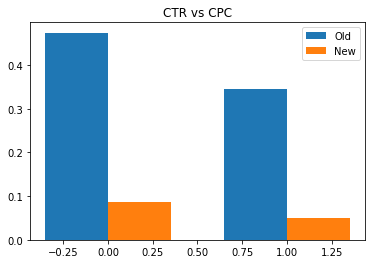

In [ ]:
labels = ['CPC', 'CTR']
cpc_values = [old_unique_terms_cpc, old_unique_terms_ctr]
ctr_values = [new_unique_terms_cpc, new_unique_terms_ctr]

# width of the bars
width = 0.35

# labels location
x = np.arange(len(labels))

fig, ax = plt.subplots()
rects1 = ax.bar( x - width/2, cpc_values, width, label= 'Old')
rects2 = ax.bar(x + width/2, ctr_values, width, label= 'New')

ax.set_title("CTR vs CPC")
ax.set_xticks(x, labels)
ax.legend()

plt.show()

We can see a lower CTR for newer terms, 5% vs 35%.
But newer terms also have a lower CPC compared to older terms: 0.09 vs 0.47


## Compare search term length over time (are we appearing against longer tail search terms, how do they perform)

### Word count and character count

In [ ]:
def word_count_table(data, index, values, aggfunc):
    count_words = lambda x: len(x)
    pivot_table = pd.pivot_table(data=data, 
                                 index=index, 
                                 values=values, 
                                 aggfunc={'Search term': count_words, 
                                          'Clicks': aggfunc, 
                                          'Impr.': aggfunc})
    
    pivot_table = pivot_table.sort_values(by=[index], ascending=True)
    sum_counts_new = pivot_table.iloc[9:].sum()
    pivot_table_copy = pivot_table.drop(pivot_table.index[9:].tolist())
    pivot_table_copy.loc['+10'] = sum_counts_new
    
    return pivot_table_copy

def word_percentage_table(data, index, values, aggfunc):
    percentage_of_total = lambda x: 100 * x.count() / data.shape[0]
    pivot_table = pd.pivot_table(data=data, 
                                 index=index, 
                                 values=values, 
                                 aggfunc={'Search term': percentage_of_total, 
                                          'Clicks': aggfunc, 
                                          'Impr.': aggfunc})
    
    pivot_table = pivot_table.sort_values(by=[index], ascending=True)
    sum_counts_new = pivot_table.iloc[9:].sum()
    pivot_table_copy = pivot_table.drop(pivot_table.index[9:].tolist())
    pivot_table_copy.loc['+10'] = sum_counts_new
    
    return pivot_table_copy



# cleaning the columns of the suffix _x
new_unique_terms_clean.columns = new_unique_terms_clean.columns.str.strip('_x')

# percentage_of_total = lambda x: 100 * x.count()/new_unique_terms_clean.shape[0]
new_word_percentage_pivot = word_percentage_table(new_unique_terms_clean, 'word_count', values= ['Search term', 'Clicks', 'Impr.'], aggfunc= np.sum)

# print('Clicks_x' in new_terms_clean.columns) # <- returns True

old_word_percentage_pivot = word_percentage_table(old_unique_terms_df, 'word_count', values= ['Search term', 'Clicks', 'Impr.'], aggfunc= np.sum)

terms_percentage = pd.merge(left= old_word_percentage_pivot['Search term'], 
                                          right= new_word_percentage_pivot['Search term'], 
                                          on= 'word_count',
                                          how= 'outer',
                                          suffixes= ['_old', '_new']
                                         )

terms_percentage_transposed= terms_percentage.transpose()
terms_percentage_transposed = terms_percentage_transposed.round(decimals=2)



# Counting the search terms

count_words = lambda x: len(x)

new_word_count_pivot = word_count_table(new_unique_terms_clean, 'word_count', values= ['Search term', 'Clicks', 'Impr.'], aggfunc= np.sum)

old_word_count_pivot = word_count_table(old_unique_terms_df, 'word_count', values= ['Search term', 'Clicks', 'Impr.'], aggfunc= np.sum)



terms_count = pd.merge(left= old_word_count_pivot['Search term'], 
                                          right= new_word_count_pivot['Search term'], 
                                          on= 'word_count',
                                          how= 'outer',
                                          suffixes= ['_old', '_new']
                                         )

terms_count_transposed= terms_count.transpose()
terms_count_transposed = terms_count.round(decimals=2)

# Counting the overlapped search terms
overlap_unique_word_count_pivot = word_count_table(overlap_terms, 'word_count', values= ['Search term', 'Clicks', 'Impr.'], aggfunc= np.sum)

overlapping_unique_word_percentage_pivot = word_percentage_table(overlap_terms, 'word_count', values= ['Search term', 'Clicks', 'Impr.'], aggfunc= np.sum)


In [ ]:
fy21_word_count = word_count_table(fy21_unique_terms, 'word_count', values= ['Search term', 'Clicks', 'Impr.'], aggfunc= np.sum)
fy22_word_count = word_count_table(fy22_unique_terms, 'word_count', values= ['Search term', 'Clicks', 'Impr.'], aggfunc= np.sum)
fy23_word_count = word_count_table(fy23_unique_terms, 'word_count', values= ['Search term', 'Clicks', 'Impr.'], aggfunc= np.sum)

# print(fy21_word_count, fy22_word_count, fy23_word_count)

In [ ]:
# Plot with numbers inside the barcharts but they look terrible. No idea how to solve them

# ax = old_new_terms_transposed.plot(kind= 'barh',
#                        stacked= True,
#                        figsize= (10,6))

# category = ['Old', 'New']

# for bar in ax.patches:
#     height = bar.get_height()
#     width = bar.get_width()
#     x = bar.get_x()
#     y = bar.get_y()
#     label_text = width
#     label_x = x + width/2
#     label_y = y + height/2
#     ax.text(label_x, label_y, label_text, ha= 'center', va= 'center')

# ax.set_yticklabels(category, rotation= 'horizontal')
# ax.legend(loc= 'best', ncol= 10)

# plt.show()


In [ ]:
old_word_count_pivot['Search term']

word_count
1       7355
2      29733
3      52059
4      50468
5      39198
6      29650
7      20808
8      13885
9       9223
+10    11270
Name: Search term, dtype: int64

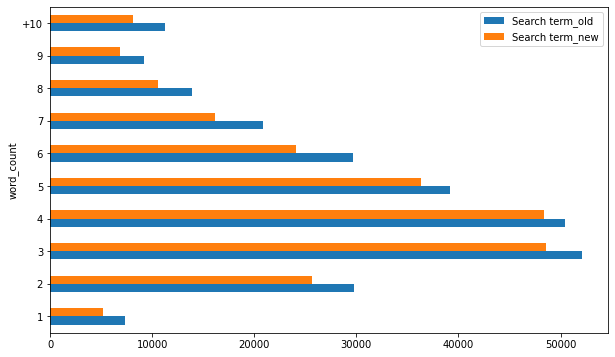

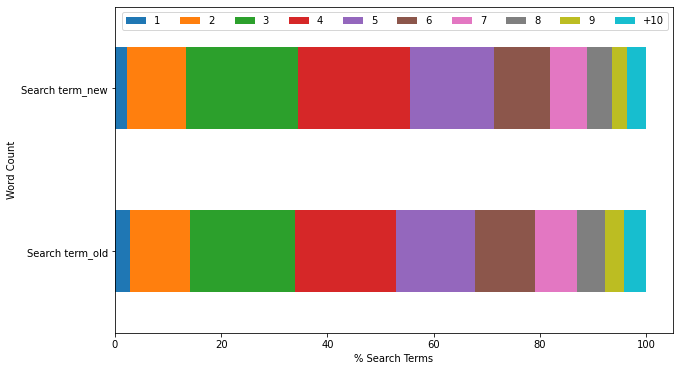

In [ ]:
terms_count_transposed.plot(kind= 'barh',
                            figsize= (10,6))

terms_percentage_transposed.plot(kind='barh',
                   stacked= True,
                   colormap= 'tab10',
                   figsize= (10,6)
                  )
plt.legend(loc='best', ncol= 10)
plt.xlabel("% Search Terms")
plt.ylabel("Word Count")


plt.show()


In [ ]:
terms_percentage_transposed

word_count,1,2,3,4,5,6,7,8,9,+10
Search term_old,2.79,11.28,19.75,19.14,14.87,11.25,7.89,5.27,3.50,4.27
Search term_new,2.25,11.15,21.13,21.05,15.82,10.47,7.02,4.61,2.97,3.53


In [ ]:
terms_count_transposed

,Search term_old,Search term_new
word_count,,
1,7355,5179
2,29733,25642
3,52059,48576
4,50468,48398
5,39198,36365
6,29650,24061
7,20808,16144
8,13885,10606
9,9223,6834


In [ ]:
# Uncomment for character_count data

# new_char_count_pivot = pd.pivot_table(new_terms_clean, 
#                                  index='character_count_x', 
#                                  values= ['Search term', 'Clicks_x'],
#                                  aggfunc= {'Search term':percentage_of_total, 
#                                            'Clicks_x': np.sum,
#                                            'Impr._x': np.sum, 
#                                            'Cost_x': np.sum
#                                           }
#                                      )

# pd.set_option('display.max_rows', 50)
# new_char_count_pivot.sort_values(by=['Search term'], ascending= False)

# Compare educational search terms over time 
## Are we appearing against more "how", "what", etc. terms? How do they perform?

What I noticed while searching for words in sentences, is that there are many search terms in different languages and different characters. For those search terms, I cannot acount them to be part of the educational terms. Some terms included emojies. Therefore, I focused only on the English words.

In [ ]:
edu_words = ['what', 'how', 'why']

In [ ]:
# import mitosheet
# mitosheet.sheet(new_terms_clean, analysis_to_replay="id-sqjtdddniw")

In [ ]:
# filtering the dataframes for educational searches
print("The number of educational search terms per year:")
print("FY23:", len(new_unique_terms_clean[new_unique_terms_clean['Search term'].str.contains(r"what|how|why")]))
print("FY22:" ,len(fy22_unique_terms[fy22_unique_terms['Search term'].str.contains("what|how|why")]))
print("FY21:", len(fy21_unique_terms[fy21_unique_terms['Search term'].str.contains("what|how|why")]))

The number of educational search terms per year:
FY23: 56176
FY22: 38812
FY21: 7013


Conclusion from here is that in FY23 there are less educational search terms when compared to FY22

In [ ]:
fy23_edu = new_unique_terms_clean[new_unique_terms_clean['Search term'].str.contains("what|how|why")]
fy22_edu = fy22_unique_terms[fy22_unique_terms['Search term'].str.contains("what|how|why")]
fy21_edu = fy21_unique_terms[fy21_unique_terms['Search term'].str.contains("what|how|why")]
overlap_edu = overlap_terms[overlap_terms['Search term'].str.contains("what|how|why")]

In [ ]:
print("The top 5 common educational phrases for FY23")
print(fy23_edu['Search term'][fy23_edu['Search term'].str.contains("what|how|why")].value_counts().head(5))

print('\n')

print("The top 5 common educational phrases for FY22")
print(fy22_edu['Search term'][fy22_edu['Search term'].str.contains("what|how|why")].value_counts().head(3))

print('\n')

print("The top 5 common educational phrases for FY21")
print(fy21_edu['Search term'][fy21_edu['Search term'].str.contains("what|how|why")].value_counts().head(3))

The top 5 common educational phrases for FY23
how to own credit card                          1
how much is my lease worth                      1
how do university loans work                    1
transunion how to download credit report        1
how long will bad debt stay on credit report    1
Name: Search term, dtype: int64


The top 5 common educational phrases for FY22
how to make credit score go up fast             1
how to prove no claims years                    1
how to transfer the balance of a credit card    1
Name: Search term, dtype: int64


The top 5 common educational phrases for FY21
how to get credit rating up fast          1
how do i get credit report                1
how do i find out who my ccjs are with    1
Name: Search term, dtype: int64


In [ ]:
fy23_edu.sort_values(by=['Impr.'], ascending= False).head()

,Search term,Search terms match type,Clicks,Impr.,CTR,Avg. CPC,Cost,Conversions,Cost / conv.,Conv. rate,character_count,word_count
339562,what is the best fixed rate bond for 1 year,Broad match,52,779,6.68,1.66,86.41,0.00,0.00,0.00,34,10
75919,what is a county court judgement,Exact match,65,399,16.29,0.16,10.54,1.93,5.45,2.98,27,6
85635,stop wasting money on car insurance this is ho...,Phrase match,28,207,13.53,0.37,10.34,3.00,3.45,10.71,51,13
316302,what is the current interest rate,Broad match,8,195,4.10,1.17,9.38,0.00,0.00,0.00,28,6
133067,what is a monzo card,Broad match,9,195,4.62,1.76,15.83,0.00,0.00,0.00,16,5


4.27 0.12 90366.81


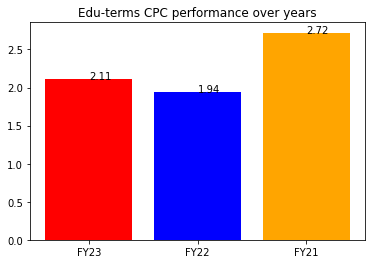

Text(0.5, 1.0, 'Edu-terms CTR performance over years')

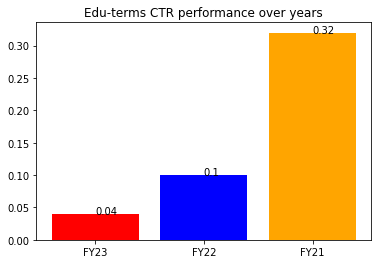

In [ ]:
fy23_edu_cpc = round(fy23_edu['Cost'].sum() / fy23_edu['Clicks'].sum(), 2)
fy23_edu_ctr = round(fy23_edu['Clicks'].sum() / fy23_edu['Impr.'].sum(), 2)
fy23_edu_cost = fy23_edu['Cost'].sum()

fy22_edu_cpc = round(fy22_edu['Cost'].sum() / fy22_edu['Clicks'].sum(), 2)
fy22_edu_ctr = round(fy22_edu['Clicks'].sum() / fy22_edu['Impr.'].sum(), 2)
fy22_edu_cost = fy22_edu['Cost'].sum()

fy21_edu_cpc = round(fy21_edu['Cost'].sum() / fy21_edu['Clicks'].sum(), 2)
fy21_edu_ctr = round(fy21_edu['Clicks'].sum() / fy21_edu['Impr.'].sum(), 2)
fy21_edu_cost = fy21_edu['Cost'].sum()

overlap_edu_cpc = round(overlap_edu['Cost'].sum() / overlap_edu['Clicks'].sum(), 2)
overlap_edu_ctr = round(overlap_edu['Clicks'].sum() / overlap_edu['Impr.'].sum(), 2)
overlap_edu_cost = overlap_edu['Cost'].sum()

values_fy23 = [fy23_edu_ctr, fy23_edu_cpc]
values_fy22 = [fy22_edu_ctr, fy22_edu_cpc]
values_fy21 = [fy21_edu_ctr, fy21_edu_cpc]
edu_cpc_values = [fy23_edu_cpc, fy22_edu_cpc, fy21_edu_cpc]
edu_ctr_values = [fy23_edu_ctr, fy22_edu_ctr, fy21_edu_ctr]

# Plottin the data
labels = ['FY23', 'FY22', 'FY21']

def add_value_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i])

# width of the bars
width = 0.6

# labels location
x = np.arange(len(labels))

# fig, ax = plt.subplots()
# rects1 = ax.bar( x + width/10, edu_cpc_values, width, color= ['red', 'blue', 'orange'])
print(overlap_edu_cpc, overlap_edu_ctr, overlap_edu_cost)

plt.bar(labels, edu_cpc_values, color= ['red', 'blue', 'orange'])

add_value_labels(labels, edu_cpc_values)
plt.title("Edu-terms CPC performance over years")
plt.xticks(x, labels)

plt.show()

add_value_labels(labels, edu_ctr_values)
plt.bar(labels, edu_ctr_values, color= ['red', 'blue', 'orange'])
plt.title("Edu-terms CTR performance over years")




It seems like the CTR for FY23 edu-terms is the lowest when compared with the others. 

The CPC for FY23 edu-terms ranks the second, first being FY22.

In [ ]:
fy23_non_edu = new_unique_terms_clean[new_unique_terms_clean['Search term'].str.contains(r"^((?!what|how|why).)*$")]
# len(fy23_non_edu) + len(fy23_edu) # for checking the length - they are equal

fy23_non_edu_cpc = round(fy23_non_edu['Cost'].sum() / fy23_non_edu['Clicks'].sum(), 2)
fy23_non_edu_ctr = round(fy23_non_edu['Clicks'].sum() / fy23_non_edu['Impr.'].sum(), 2)

print("The CPC value for non-educational terms in FY23 is:", fy23_non_edu_cpc)
print("The CTR value for non-educational terms in FY23 is:", fy23_non_edu_ctr)



<ipython-input-28-b4730f727847>:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  fy23_non_edu = new_unique_terms_clean[new_unique_terms_clean['Search term'].str.contains(r"^((?!what|how|why).)*$")]


The CPC value for non-educational terms in FY23 is: 1.67
The CTR value for non-educational terms in FY23 is: 0.05


In [ ]:
def comparing_terms_within_year(new_dataframe, old_dataframe):
    all_terms = pd.merge(new_dataframe, old_dataframe, on=['Search term'], how= 'left', indicator='Exist')
    shared_old_terms = all_terms[all_terms['Exist']=='both']

    newer_terms = all_terms.drop(all_terms.columns[[-3, -4, -5, -6 , -7, -8, -9, -10, -11, -12]], axis=1)
    # old_terms_left = old_terms.filter(regex='_x')
    newer_terms.columns = newer_terms.columns.str.strip('_x')
    
    older_terms = all_terms.drop(all_terms.columns[[1, 2, 3, 4, 5, 6 , 7, 8, 9, 10, 11, 12]], axis=1)
    # old_terms_right = old_terms.filter(regex='_y')
    older_terms.columns = older_terms.columns.str.strip('_y')
    
    newer_terms_cpc = newer_terms['Cost'].sum() / newer_terms['Clicks'].sum()
    newer_terms_ctr = newer_terms['Clicks'].sum() / newer_terms['Impr.'].sum()

    older_terms_cpc = older_terms['Cost'].sum() / older_terms['Clicks'].sum()
    older_terms_ctr = older_terms['Clicks'].sum() / older_terms['Impr.'].sum() 
    
    return all_terms, newer_terms, older_terms, round(newer_terms_cpc, 2), round(newer_terms_ctr, 2), round(older_terms_cpc, 2), round(older_terms_ctr, 2)


fy23_old_terms_left = comparing_terms_within_year(fy23_unique_terms, fy22_unique_terms)[1]
fy23_old_terms_right = comparing_terms_within_year(fy23_unique_terms, fy22_unique_terms)[2]
# fy22_old_terms = comparing_terms_within_year(fy22, fy21)[0]

fy23_old_terms_left_cpc, fy23_old_terms_left_ctr = comparing_terms_within_year(fy23_unique_terms, fy22_unique_terms)[3], comparing_terms_within_year(fy23_unique_terms, fy22_unique_terms)[4]
fy23_old_terms_right_cpc, fy23_old_terms_right_ctr = comparing_terms_within_year(fy22_unique_terms, fy21_unique_terms)[5], comparing_terms_within_year(fy22_unique_terms, fy21_unique_terms)[6]

print(f"FY23 old terms in FY23: CPC is {fy23_old_terms_left_cpc} and CTR is {fy23_old_terms_left_ctr}")
print(f"FY23 old term in that also appear in FY22: CPC is {fy23_old_terms_right_cpc} and CTR {fy23_old_terms_right_ctr}")

print("Printing the CPC and CTR values for FY23 only new terms:", round(new_unique_terms_cpc,2), ",", round(new_unique_terms_ctr, 2))

FY23 old terms in FY23: CPC is 2.2 and CTR is 0.13
FY23 old term in that also appear in FY22: CPC is 0.44 and CTR 0.45
Printing the CPC and CTR values for FY23 only new terms: 0.09 , 0.05


In [ ]:
fy23_left = comparing_terms_within_year(fy23_unique_terms, fy21_unique_terms)[0]

In [ ]:
fy23_old_terms_left = comparing_terms_within_year(fy23_unique_terms, fy21_unique_terms)[1]
fy23_21_old_terms = comparing_terms_within_year(fy23_unique_terms, fy21_unique_terms)[2]


fy23_21_cpc = comparing_terms_within_year(fy23_unique_terms, fy21_unique_terms)[5]
fy23_21_ctr = comparing_terms_within_year(fy23_unique_terms, fy21_unique_terms)[6]

print(f"CPC for FY21 is {fy23_21_cpc}")
print(f"CTR for FY21 is {fy23_21_ctr}")

CPC for FY21 is 0.44
CTR for FY21 is 0.45


The CPC for absolute new terms in FY23 is 0.1 and the CPC for old terms in the same year is 1.47. This shows that newer terms tend to have a lower CPC but at the same time they also have a lower CTR of only 5% vs 25%. 

We also looked at the comparison of the old terms that appear on both FY23 and in FY22. Here, we notice that the old terms in FY23 underperform in comparison with same the terms that were in FY22. This could suggest some changes in the 

### Further investigate

new_terms in fy23 vs old_terms that appear in fy23 (which are excluded now) - possibly accoiunting for the campaign strategy changes - to be sure that there is a real diff

same thing for fy22 with terms present in fy21


ML approach
- pass the search term to have a vector value
- k-means clustering above them
  - assign a label for each cluster
- look at CVR for each cluster

Or train a model that we give as input the embedded layer and predict if a search term is converted or not (classificaiton problem), train the model and through training we update also the embeddings (bert).



It seems like the CTR for FY23 edu-terms is the lowest when compared with the others. 

The CPC for FY23 edu-terms ranks the second, first being FY22

# Machine Learning Approach

## Tensorflow hub embeddings

In [ ]:
new_unique_terms_clean.shape

(229918, 12)

In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
# embed = hub.load("https://tfhub.dev/google/nnlm-en-dim128/2")

In [ ]:
# transforming the text into high-dimensional vectors
search_term_embeddings = embed(new_unique_terms_clean['Search term'])

In [ ]:
search_term_embeddings

<tf.Tensor: shape=(229918, 512), dtype=float32, numpy=
array([[ 0.00179877, -0.06559651, -0.00413273, ..., -0.01248536,
         0.07092302, -0.01712941],
       [ 0.00625866,  0.00523037,  0.01995924, ..., -0.01280073,
        -0.0041884 , -0.06078195],
       [-0.0356682 , -0.09909724,  0.03996741, ..., -0.00859387,
         0.02039817,  0.02455291],
       ...,
       [-0.06975619, -0.07375636,  0.02341536, ..., -0.00106159,
         0.01231523, -0.03759633],
       [-0.03172106, -0.05650297,  0.07088447, ..., -0.00291346,
        -0.04717206,  0.03945759],
       [-0.02927842, -0.07941067, -0.00366341, ...,  0.04950533,
        -0.02486998,  0.00048836]], dtype=float32)>

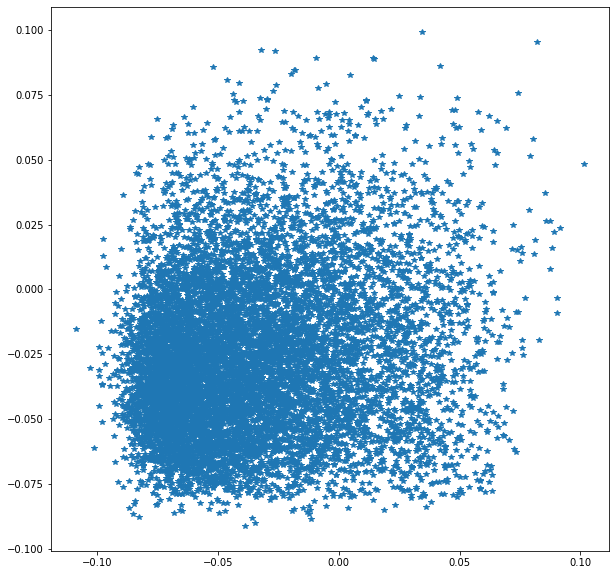

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(search_term_embeddings[:10000, 0], search_term_embeddings[:10000, 10], '*')

In [ ]:
# used for vizualisations purposes. Going from a high dimensional space to a 2D space

# # Comment this bit of code if X_embedded has been saved
# from sklearn.manifold import TSNE
# X_embedded = TSNE(n_components=2, learning_rate='auto',
#                   init='random', perplexity=50).fit_transform(search_term_embeddings)


# Run this only if you previously ran TSNE on X_embedded. This will save 2h30' of run time

X_embedded = np.genfromtxt("/content/drive/MyDrive/Colab_Notebooks/EXPN NLP Analysis/tsne_vectors_perplexity_50.csv", delimiter=",")


In [ ]:

X_embedded = X_embedded[1:]

In [ ]:
# # Saving the X_embedded as a .csv file to save computing time

# tsne_df = pd.DataFrame(X_embedded, columns=["x", "y"])

# # Save the dataframe to a CSV file
# tsne_df.to_csv("/content/drive/MyDrive/Colab_Notebooks/EXPN NLP Analysis/tsne_vectors_perplexity_50.csv", index=False)

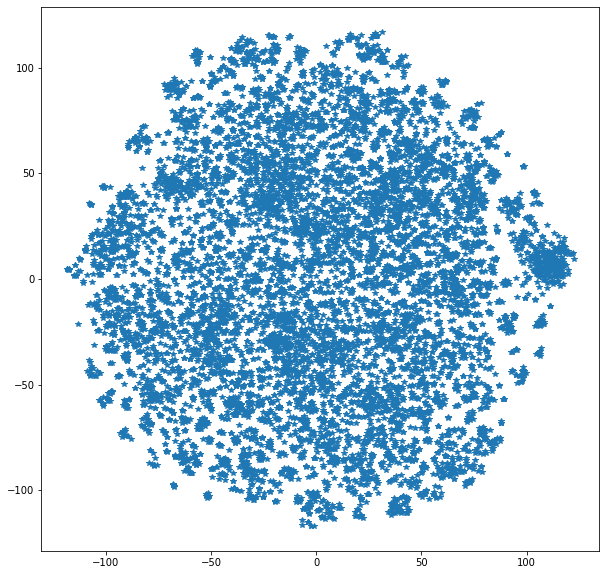

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(X_embedded[:10000, 0], X_embedded[:10000, 1], '*')

In [ ]:
from sklearn.cluster import KMeans

# Change the n_clusters between 100/200 and 6.
# I have changed the n_clusters to 6 in order to see if there is a clearer separation of the clusters in terms of keywords
kmeans = KMeans(init="k-means++", n_clusters=6, n_init=4)
kmeans.fit(search_term_embeddings)


KMeans(n_clusters=6, n_init=4)

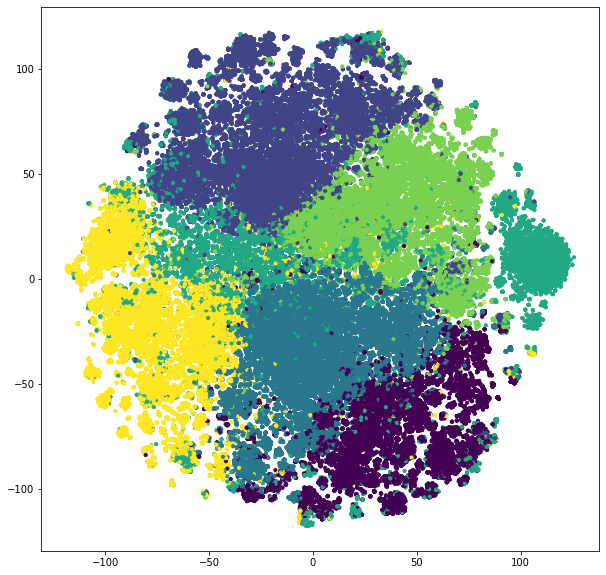

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=10, c=kmeans.labels_)

In [ ]:
df = new_unique_terms_clean.copy()
df['cluster_id'] = kmeans.labels_

In [ ]:
df.groupby(by='cluster_id').apply(lambda x: x['Clicks'].sum() / float(x['Impr.'].sum())).sort_values(ascending=False)

cluster_id
5    0.089203
4    0.046709
0    0.046405
2    0.042637
1    0.041374
3    0.038802
dtype: float64

In [ ]:
# kmeans = KMeans(init="k-means++", n_clusters=200, n_init=4)
# kmeans.fit(search_term_embeddings)

In [ ]:
# X_embedded_2 = TSNE(n_components=2, learning_rate='auto',
#                   init='random', perplexity=5).fit_transform(kmeans.cluster_centers_)

#                   # perplexity = how close or far from a points is from its neighbours 

In [ ]:
# plt.figure(figsize=(10, 10))
# plt.plot(X_embedded_2[:10000, 0], X_embedded_2[:10000, 1], '*')

In [ ]:
# kmeans2 = KMeans(init="k-means++", n_clusters=6, n_init=4)
# kmeans2.fit(kmeans.cluster_centers_)
# main_cluster_id = kmeans2.predict(kmeans.cluster_centers_)

# # X_embedded = TSNE(n_components=2, learning_rate='auto',
# #                   init='random', perplexity=20).fit_transform(kmeans.cluster_centers_)

In [ ]:
# plt.figure(figsize=(10, 10))
# plt.scatter(X_embedded_2[:, 0], X_embedded_2[:, 1], s=10, c=kmeans2.labels_)

Recap of the process the Tensor Flow process:
- 


Keyword extraction 
Sentiment analysis (google it) 

In [ ]:
# df.reset_index(drop= True, inplace= True)
# df.head()

# df['main_cluster_id'] = None

# for i in range(len(df)):
#   cluster_id = df.loc[i, 'cluster_id']
#   df.loc[i, 'main_cluster_id'] = main_cluster_id[cluster_id]

# df.head()

In [ ]:
# df_main_clusters = df[['Search term', 'main_cluster_id']].sort_values(by='main_cluster_id', ascending= True)
# df_main_clusters[df_main_clusters['main_cluster_id']==1]

In [ ]:
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.probability import FreqDist

# def nltk_extraction(df, column_name):
#     """
#     Extracts keywords from a DataFrame column
#     :param df: DataFrame to extract keywords from
#     :param column_name: Name of the column to extract keywords from
#     :return: A list of keywords
#     """
#     # Convert the column to a list
#     text = df[column_name].tolist()

#     # Tokenize the words in the text
#     words = [word_tokenize(sentence) for sentence in text]

#     # Flatten the list of words
#     words = [word.lower() for sublist in words for word in sublist]

#     # Remove stop words
#     stop_words = set(stopwords.words('english'))
#     words = [word for word in words if word not in stop_words]

#     # Compute the frequency distribution of the words
#     fdist = FreqDist(words)
    
#     # Extract the keywords 
#     keywords = [word for word, freq in fdist.most_common(20)]

#     return keywords


# cluster_keywords = [[] for _ in range(6)]

# for cluster in range(6):
#   keywords = nltk_extraction(df_main_clusters[df_main_clusters['main_cluster_id']==cluster], 'Search term')
#   cluster_keywords[cluster].extend(keywords)

# cluster_keywords = [[] for _ in range(6)]

# for cluster in range(6):
#   keywords = nltk_extraction(df[df['cluster_id']==cluster], 'Search term')
#   cluster_keywords[cluster].extend(keywords)


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer


def tfidf_extraction(df, column_name, n_keywords, lem_flag= False):
    # Create a new column in the dataframe which contains all the text in lowercase form
    df['text_lower'] = df[column_name].str.lower()

    # Tokenize the column into words
    words = word_tokenize(df['text_lower'].to_string())

    # Use the nltk FreqDist function to get the frequency of each word
    fdist = FreqDist(words)

    # Create a list of stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.add(('de', 'co', 'com'))
    # stop_words -= {'why', 'how', 'what'}

    # Remove the stopwords from the list of words
    filtered_words = [word for word in words if word not in stop_words]

    # # Lemmatize words
    if lem_flag:
      lemmatizer = WordNetLemmatizer()
      lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]


    # Use the sklearn TfidfVectorizer to compute the tf-idf values for each word
    tfidf = TfidfVectorizer()
    # tfidf_matrix = tfidf.fit_transform(filtered_words)
    if lem_flag:
      tfidf_matrix = tfidf.fit_transform(lemmatized_words)
    else:
      tfidf_matrix = tfidf.fit_transform(filtered_words)

    # Identify the top n keywords with the highest tf-idf values
    feature_names = tfidf.get_feature_names_out()
    tfidf_scores = zip(tfidf.get_feature_names_out(),
                       np.asarray(tfidf_matrix.sum(axis=0)).ravel())
    tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)

    # Return the list of keywords and their tf-idf scores
    return [word for word, score in tfidf_scores[:n_keywords]], tfidf_scores[:n_keywords]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
a_list = [[] for _ in range(6)]

for cluster in range(6):
   keywords = tfidf_extraction(df[df['cluster_id']==cluster], 'Search term', 20)[1]
   a_list[cluster].extend(keywords)

a_list[0]

<ipython-input-53-43e59e09cca0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_lower'] = df[column_name].str.lower()


[('mortgage', 13542.0),
 ('interest', 9559.0),
 ('rates', 8841.0),
 ('rate', 6849.0),
 ('best', 6407.0),
 ('uk', 3891.0),
 ('fixed', 3121.0),
 ('savings', 2374.0),
 ('bank', 2237.0),
 ('year', 2001.0),
 ('loan', 1876.0),
 ('mortgages', 1858.0),
 ('get', 1787.0),
 ('home', 1739.0),
 ('buy', 1402.0),
 ('current', 1335.0),
 ('calculator', 1224.0),
 ('accounts', 1183.0),
 ('account', 1137.0),
 ('let', 1035.0)]

In [ ]:
a_list[2]

[('loan', 32659.0),
 ('loans', 10644.0),
 ('personal', 6592.0),
 ('bank', 3922.0),
 ('get', 3805.0),
 ('car', 3066.0),
 ('interest', 2992.0),
 ('credit', 2945.0),
 ('calculator', 2581.0),
 ('best', 1597.0),
 ('rate', 1594.0),
 ('home', 1573.0),
 ('uk', 1376.0),
 ('online', 1370.0),
 ('apply', 1208.0),
 ('student', 1033.0),
 ('pay', 1009.0),
 ('rates', 1009.0),
 ('money', 947.0),
 ('much', 790.0)]

In [ ]:
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.probability import FreqDist

import glob

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Spacy
import spacy
from nltk.corpus import stopwords

# visualisation
!pip install pyldavis==3.3.1
import pyLDAvis
import pyLDAvis.gensim_models

In [ ]:
all_data = df['Search term']

In [ ]:
stopwords = stopwords.words('english')
stopwords.extend(('de', 'com', 'www', 'co'))

In [ ]:
def lemmatization (texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
  nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
  texts_out = []
  for text in texts:
    doc= nlp(text)
    new_text = []
    for token in doc:
      if token.pos_ in allowed_postags:
        new_text.append(token.lemma_)
    
    final = " ".join(new_text)
    texts_out.append(final)

  return texts_out

lemmatized_search_terms = lemmatization(all_data)
print(lemmatized_search_terms[:20])

['deposit house buying scheme', '', 'good mortgage rate right now', 'personal loan calculation', '16e insurance', 'frais', 'cashback program complete saving', 'personal loan few minute', 'instant approval credit card', 'free credit score com safe use', 'cheap first time buyer mortgage', 'institution', 'credit card', 'own credit card', 'platinum card credit limit', 'saving expert', 'auto loan payoff', 'good credit score buy car', 'property rental credit check', 'good currency card']


In [ ]:
def gen_words(search_terms):
  final = []
  for term in search_terms:
    new = gensim.utils.simple_preprocess(term, deacc= True)
    final.append(new)
  return final

data_words = gen_words(lemmatized_search_terms)
print(data_words[:20])

[['deposit', 'house', 'buying', 'scheme'], [], ['good', 'mortgage', 'rate', 'right', 'now'], ['personal', 'loan', 'calculation'], ['insurance'], ['frais'], ['cashback', 'program', 'complete', 'saving'], ['personal', 'loan', 'few', 'minute'], ['instant', 'approval', 'credit', 'card'], ['free', 'credit', 'score', 'com', 'safe', 'use'], ['cheap', 'first', 'time', 'buyer', 'mortgage'], ['institution'], ['credit', 'card'], ['own', 'credit', 'card'], ['platinum', 'card', 'credit', 'limit'], ['saving', 'expert'], ['auto', 'loan', 'payoff'], ['good', 'credit', 'score', 'buy', 'car'], ['property', 'rental', 'credit', 'check'], ['good', 'currency', 'card']]


In [ ]:
id2word = corpora.Dictionary(data_words)

corpus = []
for term in data_words:
  new = id2word.doc2bow(term)
  corpus.append(new)

print(corpus[:20])

word = id2word[0]
print(word) #corresponds to the word aviva

[[(0, 1), (1, 1), (2, 1), (3, 1)], [], [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)], [(9, 1), (10, 1), (11, 1)], [(12, 1)], [(13, 1)], [(14, 1), (15, 1), (16, 1), (17, 1)], [(10, 1), (11, 1), (18, 1), (19, 1)], [(20, 1), (21, 1), (22, 1), (23, 1)], [(22, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1)], [(5, 1), (29, 1), (30, 1), (31, 1), (32, 1)], [(33, 1)], [(21, 1), (22, 1)], [(21, 1), (22, 1), (34, 1)], [(21, 1), (22, 1), (35, 1), (36, 1)], [(17, 1), (37, 1)], [(10, 1), (38, 1), (39, 1)], [(4, 1), (22, 1), (27, 1), (40, 1), (41, 1)], [(22, 1), (42, 1), (43, 1), (44, 1)], [(4, 1), (21, 1), (45, 1)]]
buying


In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus= corpus,
                                            id2word= id2word,
                                            num_topics = 6,
                                            random_state= 1,
                                            update_every= 1,
                                            chunksize= 100,
                                            passes= 10,
                                            alpha= "auto")

# Visualizations

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R= 10)
vis

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.138534  0.376012       1        1  29.116673
1     -0.132326 -0.375770       2        1  17.501140
5     -0.393903 -0.074073       3        1  14.965819
2     -0.258835  0.310720       4        1  14.542954
3      0.267888 -0.306212       5        1  13.305389
4      0.378642  0.069324       6        1  10.568024, topic_info=       Term          Freq         Total Category  logprob  loglift
10     loan  46914.000000  46914.000000  Default  10.0000  10.0000
22   credit  63727.000000  63727.000000  Default   9.0000   9.0000
21     card  48446.000000  48446.000000  Default   8.0000   8.0000
41      car  23275.000000  23275.000000  Default   7.0000   7.0000
7      rate  20338.000000  20338.000000  Default   6.0000   6.0000
..      ...           ...           ...      ...      ...      ...
55      low   2082.527698   2083.342240   Topic6  -3.5733   2.2469
319  number   1794.783595   1795.598236   Topic6  -3.7220   2.2469
53     high   1682.361662   1683.176719   Topic6  -3.7867   2.2469
148     old   1376.134889   1376.948867   Topic6  -3.9876   2.2467
68     find   1338.733160   1339.547802   Topic6  -4.0152   2.2467

[70 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
72        3  0.999821     account
211       2  0.999707       apply
46        3  0.999829         bad
106       1  0.999676     balance
60        2  0.999831        bank
40        3  0.999804         buy
81        4  0.999883  calculator
41        4  0.999965         car
21        1  0.999983        card
114       3  0.999733        cash
30        2  0.999721       cheap
42        2  0.999822       check
24        5  0.999066         com
77        2  0.999509     company
78        5  0.999448     compare
22        1  0.999991      credit
165       4  0.999633        deal
179       1  0.999568       debit
65        6  0.999764        debt
92        2  0.999545         fee
111       4  0.999930     finance
68        6  0.999591        find
31        2  0.999356       first
85        3  0.999780         fix
25        6  0.999823        free
47        3  0.999907         get
4         1  0.999950        good
53        6  0.999301        high
151       5  0.999736        home
2         3  0.999442       house
12        3  0.999836   insurance
97        5  0.999963    interest
61        4  0.999650       lease
71        5  0.999440      lender
35        1  0.999717       limit
10        2  0.999991        loan
89        4  0.999786        long
55        6  0.999836         low
156       5  0.999894       money
5         3  0.999933    mortgage
119       4  0.999820        much
319       6  0.999667      number
364       1  0.999723       offer
148       6  0.999311         old
124       4  0.999902      online
75        1  0.999865         pay
125       4  0.999785     payment
11        2  0.999887    personal
7         5  0.999963        rate
150       6  0.999839      report
49        3  0.999623      review
206       1  0.999479        sale
17        5  0.999847      saving
27        6  0.999960       score
458       2  0.999701     student
136       4  0.999353        take
107       1  0.999655    transfer
28        5  0.999643         use
167       5  0.999560        well
182       6  0.999799        year, R=10, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 6, 3, 4, 5])

# Suggestions:
- The current number of topics (6) has been arbitrarily chosen, but there can be more topics out there that we can uncover.
- The current method used to extract only a keywords 